<a href="https://colab.research.google.com/github/mehdiguel/ML_Projects/blob/main/BilBerry_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [6]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [8]:
x  = '/content/drive/MyDrive/Field_Road_Classification'
path = Path(x)
path.ls()

[PosixPath('/content/drive/MyDrive/Field_Road_Classification/fields'),
 PosixPath('/content/drive/MyDrive/Field_Road_Classification/roads')]

In [ ]:
roads = load_images_from_folder('/content/drive/MyDrive/Field_Road_Classification/roads')

In [9]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


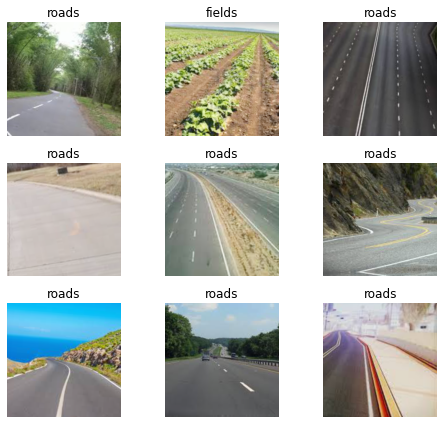

In [10]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

In [17]:
data.label_list

LabelLists;

Train: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fields,fields,fields,fields,fields
Path: /content/drive/MyDrive/Field_Road_Classification;

Valid: LabelList (18 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fields,fields,fields,fields,fields
Path: /content/drive/MyDrive/Field_Road_Classification;

Test: None

In [12]:
print(data.classes)
len(data.classes)
data.c

['fields', 'roads']


2

In [13]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


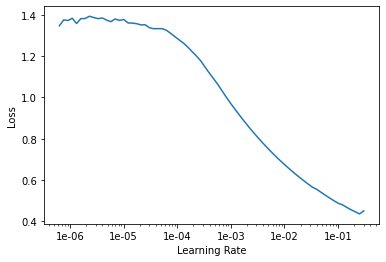

In [14]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [18]:
lr1 = 1e-4
lr2 = 1e-1
learn.fit_one_cycle(30,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,1.325164,5.592515,0.444444,00:19
1,0.721525,7.332289,0.500000,00:14
2,0.488686,6.307987,0.555556,00:14
3,0.404649,1.475591,0.888889,00:14
4,0.322568,1.126888,0.944444,00:14
5,0.279134,1.533248,0.888889,00:14
6,0.237334,2.093820,0.833333,00:14
7,0.229070,0.932336,0.888889,00:14
8,0.207947,1.074128,0.888889,00:22
9,0.201668,0.467819,0.944444,00:16


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [19]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.740920,0.944444,00:21
1,0.000067,1.119788,0.944444,00:22
2,0.000044,1.688957,0.944444,00:19
3,0.007565,6.269866,0.722222,00:19
4,0.005990,22.778633,0.555556,00:19
5,0.004979,38.046890,0.555556,00:19
6,0.015856,47.419853,0.555556,00:19
7,0.034556,29.484497,0.611111,00:19
8,0.030399,15.600994,0.611111,00:19
9,0.051225,1.213838,0.888889,00:19


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


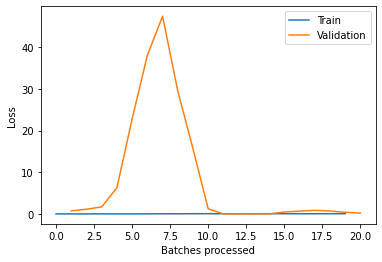

In [20]:
learn.recorder.plot_losses()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


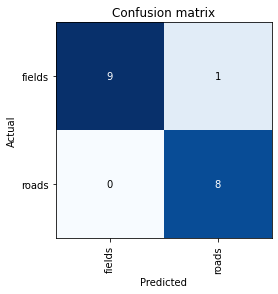

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

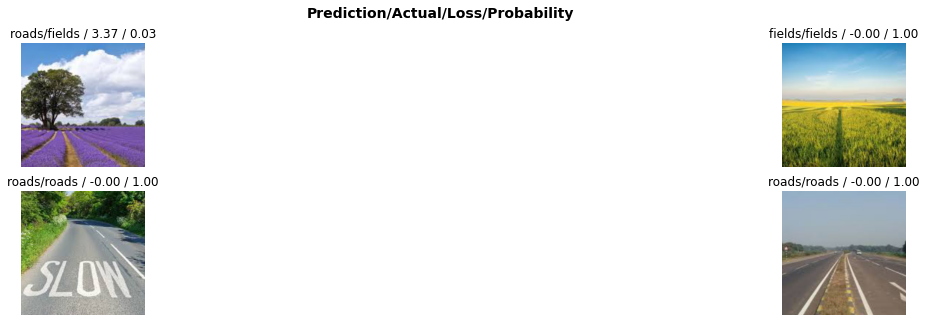

In [22]:
interp.plot_top_losses(4,figsize = (25,5))

In [23]:
img = open_image('/content/drive/MyDrive/0001.jpg')
print(learn.predict(img)[0])

roads


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


In [24]:
img = open_image('/content/drive/MyDrive/0002.jpg')
print(learn.predict(img)[0])

fields


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


In [ ]:
#learn.export(file = Path("/kaggle/working/export.pkl"))
#learn.model_dir = "/kaggle/working"
#learn.save("stage-1",return_path=True)